In [1]:
#金融风控
#魔镜杯风控算法比赛--风控
# 1 从大概400个数据维度中评估当前用户的信用状态，给每个借款人打出当前状态的信用分
# 2 在此基础上，结合新发表的信息，对借款人六个月内的逾期率进行预测，帮助投资人提供关键的决策依据。

import numpy as np
import pandas as pd 
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline   
#内嵌绘图?

import seaborn as sns
sns.set(style = 'whitegrid')  #设置图片的背景格式

import arrow    #日期、时间处理模块

In [2]:
import pandas as pd
path = 'D:\DataSet\mojingbei\First_Round\Training Set\PPD_Training_Master_GBK_3_1_Training_Set.csv'
train_master = pd.read_csv(path,encoding = "gbk")

In [3]:
#列出数据集的全部列索引
list(train_master.columns)

['Idx',
 'UserInfo_1',
 'UserInfo_2',
 'UserInfo_3',
 'UserInfo_4',
 'WeblogInfo_1',
 'WeblogInfo_2',
 'WeblogInfo_3',
 'WeblogInfo_4',
 'WeblogInfo_5',
 'WeblogInfo_6',
 'WeblogInfo_7',
 'WeblogInfo_8',
 'WeblogInfo_9',
 'WeblogInfo_10',
 'WeblogInfo_11',
 'WeblogInfo_12',
 'WeblogInfo_13',
 'WeblogInfo_14',
 'WeblogInfo_15',
 'WeblogInfo_16',
 'WeblogInfo_17',
 'WeblogInfo_18',
 'UserInfo_5',
 'UserInfo_6',
 'UserInfo_7',
 'UserInfo_8',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_11',
 'UserInfo_12',
 'UserInfo_13',
 'UserInfo_14',
 'UserInfo_15',
 'UserInfo_16',
 'UserInfo_17',
 'UserInfo_18',
 'UserInfo_19',
 'UserInfo_20',
 'UserInfo_21',
 'UserInfo_22',
 'UserInfo_23',
 'UserInfo_24',
 'Education_Info1',
 'Education_Info2',
 'Education_Info3',
 'Education_Info4',
 'Education_Info5',
 'Education_Info6',
 'Education_Info7',
 'Education_Info8',
 'WeblogInfo_19',
 'WeblogInfo_20',
 'WeblogInfo_21',
 'WeblogInfo_23',
 'WeblogInfo_24',
 'WeblogInfo_25',
 'WeblogInfo_26',
 'WeblogInfo_27'

In [4]:
#查看头部数据
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,222,-1,0,0,0,0,0,1,0,2014/3/5
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,1,-1,0,0,0,0,0,2,0,2014/2/26
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,1,0,0,0,0,0,2014/2/28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,0,0,0,0,0,0,2014/2/25
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27


In [5]:
#查看数据集的基本信息
train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 228 entries, Idx to ListingInfo
dtypes: float64(38), int64(170), object(20)
memory usage: 52.2+ MB


In [6]:
path2 = 'D:\DataSet\mojingbei\First_Round\Training Set\PPD_LogInfo_3_1_Training_Set.csv'
train_loginfo = pd.read_csv(path2,encoding = "gbk")

In [7]:
train_loginfo.head()

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27


In [8]:
train_loginfo.describe()

,Idx,LogInfo1,LogInfo2
count,580551.000000,580551.000000,580551.000000
mean,44911.327794,11.760608,6.070486
std,26484.183832,63.741930,5.123067
min,3.000000,-10.000000,0.000000
25%,21450.000000,-4.000000,2.000000
50%,45325.000000,1.000000,6.000000
75%,67913.000000,2.000000,6.000000
max,91703.000000,3001.000000,23.000000


In [9]:
path3 = 'D:\DataSet\mojingbei\First_Round\Training Set\PPD_Userupdate_Info_3_1_Training_Set.csv'
train_userinfo = pd.read_csv(path3,encoding = "gbk")

In [10]:
train_userinfo.head()

,Idx,ListingInfo1,UserupdateInfo1,UserupdateInfo2
0,10001,2014/03/05,_EducationId,2014/02/20
1,10001,2014/03/05,_HasBuyCar,2014/02/20
2,10001,2014/03/05,_LastUpdateDate,2014/02/20
3,10001,2014/03/05,_MarriageStatusId,2014/02/20
4,10001,2014/03/05,_MobilePhone,2014/02/20


In [11]:
##-----------------------------##
#  数据清洗 --  缺失值

#检查缺失值的情况
train_master.isnull()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#统计每一列缺失值的数量
null_sum = train_master.isnull().sum()
print(null_sum)

Idx                   0
UserInfo_1            6
UserInfo_2          302
UserInfo_3            7
UserInfo_4          268
                   ... 
SocialNetwork_15      0
SocialNetwork_16      0
SocialNetwork_17      0
target                0
ListingInfo           0
Length: 228, dtype: int64


In [13]:
#将存在缺失值的列提取出来

null_sum = null_sum[null_sum!=0]
null_sum_df = DataFrame(null_sum, columns=['num'])

In [14]:
print(null_sum_df)

                 num
UserInfo_1         6
UserInfo_2       302
UserInfo_3         7
UserInfo_4       268
WeblogInfo_1   29030
WeblogInfo_2    1658
WeblogInfo_3   29030
WeblogInfo_4    1651
WeblogInfo_5    1651
WeblogInfo_6    1651
UserInfo_11    18909
UserInfo_12    18909
UserInfo_13    18909
WeblogInfo_19   2963
WeblogInfo_20   8050
WeblogInfo_21   3074
WeblogInfo_23    253
WeblogInfo_24    253
WeblogInfo_25    253
WeblogInfo_26    253
WeblogInfo_27    253
WeblogInfo_28    253
WeblogInfo_29    253
WeblogInfo_30    253
WeblogInfo_31    253
WeblogInfo_32    253
WeblogInfo_33    253
WeblogInfo_34    253
WeblogInfo_35    253
WeblogInfo_36    253
WeblogInfo_37    253
WeblogInfo_38    253
WeblogInfo_39    253
WeblogInfo_40    253
WeblogInfo_41    253
WeblogInfo_42    253
WeblogInfo_43    253
WeblogInfo_44    253
WeblogInfo_45    253
WeblogInfo_46    253
WeblogInfo_47    253
WeblogInfo_48    253
WeblogInfo_49    253


In [15]:
#缺失率的计算
null_sum_df['ratio'] = null_sum_df['num'] /  30000.0

In [16]:
#将表格中的数据按照缺失率进行排序
null_sum_df.sort_values(by='ratio', ascending=False, inplace=True)

In [17]:
print(null_sum_df)

                 num     ratio
WeblogInfo_3   29030  0.967667
WeblogInfo_1   29030  0.967667
UserInfo_11    18909  0.630300
UserInfo_13    18909  0.630300
UserInfo_12    18909  0.630300
WeblogInfo_20   8050  0.268333
WeblogInfo_21   3074  0.102467
WeblogInfo_19   2963  0.098767
WeblogInfo_2    1658  0.055267
WeblogInfo_4    1651  0.055033
WeblogInfo_5    1651  0.055033
WeblogInfo_6    1651  0.055033
UserInfo_2       302  0.010067
UserInfo_4       268  0.008933
WeblogInfo_43    253  0.008433
WeblogInfo_38    253  0.008433
WeblogInfo_39    253  0.008433
WeblogInfo_40    253  0.008433
WeblogInfo_41    253  0.008433
WeblogInfo_42    253  0.008433
WeblogInfo_28    253  0.008433
WeblogInfo_44    253  0.008433
WeblogInfo_45    253  0.008433
WeblogInfo_46    253  0.008433
WeblogInfo_47    253  0.008433
WeblogInfo_36    253  0.008433
WeblogInfo_48    253  0.008433
WeblogInfo_37    253  0.008433
WeblogInfo_49    253  0.008433
WeblogInfo_35    253  0.008433
WeblogInfo_34    253  0.008433
WeblogIn

In [18]:
#删除缺失严重的列 -- 缺失率超过20%

train_master.drop(['WeblogInfo_3','WeblogInfo_1','UserInfo_11',
                   'UserInfo_12','WeblogInfo_20'],
                 axis=1, inplace=True)
train_master.drop(['UserInfo_13'],axis=1,inplace=True)

In [19]:
#统计每一行缺失值的数量
record_nan = train_master.isnull().sum(axis=1).sort_values(ascending=False)

In [20]:
record_nan

29341    33
18637    31
17386    31
29130    31
29605    31
         ..
17531     0
17532     0
17533     0
17534     0
0         0
Length: 30000, dtype: int64

In [21]:
#删除缺失值数量大于5的行
drop_record_index = [i for i in record_nan.loc[(record_nan>=5)].index]

In [22]:
train_master.shape

(30000, 222)

In [23]:
train_master.drop(drop_record_index, inplace=True)

In [24]:
train_master.shape

(29189, 222)

In [25]:
#剩余的空值的个数

train_master.isnull().sum().sum()

9808

In [26]:
# 填补剩余缺失值，通过value_counts观察是连续、离散变量，然后用众数、平均数来填补空值。
# UserInfo_2为null的行，UserInfo_2列置为'位置地点'
train_master.loc[train_master['UserInfo_2'].isnull(), 'UserInfo_2'] = '位置地点'
# UserInfo_4为null的行，UserInfo_4列置为'位置地点'
train_master.loc[train_master['UserInfo_4'].isnull(), 'UserInfo_4'] = '位置地点'

def fill_nan(f, method):
    if method == 'most':
        common_value = pd.value_counts(train_master[f], ascending=False).index[0]
    else:
        common_value = train_master[f].mean()
    train_master.loc[train_master[f].isnull(), f] = common_value

fill_nan('UserInfo_1', 'most')
fill_nan('UserInfo_3', 'most')
fill_nan('WeblogInfo_2', 'most')
fill_nan('WeblogInfo_4', 'mean')
fill_nan('WeblogInfo_5', 'mean')
fill_nan('WeblogInfo_6', 'mean')
fill_nan('WeblogInfo_19', 'most')
fill_nan('WeblogInfo_21', 'most')

In [27]:
train_master.isnull().sum().sum()

0

In [28]:
train_master.duplicated().sum()

0

In [29]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,1.0,1.000000,1.000000,1.000000,14,...,222,-1,0,0,0,0,0,1,0,2014/3/5
1,10002,1.0,温州,4.0,温州,0.0,1.000000,1.000000,1.000000,14,...,1,-1,0,0,0,0,0,2,0,2014/2/26
2,10003,1.0,宜昌,3.0,宜昌,0.0,2.000000,2.000000,2.000000,9,...,-1,-1,-1,1,0,0,0,0,0,2014/2/28
3,10006,4.0,南平,1.0,南平,0.0,3.027468,1.817292,2.950044,2,...,-1,-1,-1,0,0,0,0,0,0,2014/2/25
4,10007,5.0,辽阳,1.0,辽阳,0.0,1.000000,1.000000,1.000000,3,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27


In [36]:
ratio_threshold = 0.5
binarized_features = []
binarized_features_most_freq_value = []

for f in train_master.columns:
    if f in ['target']:
        continue
    #每一列非空值的数量（不知道这一操作有什么用）
    not_null_sum = (train_master[f].notnull()).sum()
    #每一列特征中取值的最多的索引
    most_count = pd.value_counts(train_master[f], ascending=False).iloc[0]
    #特征取值最多的实际值
    most_value = pd.value_counts(train_master[f], ascending=False).index[0]
    #某一特征中取值最多的值占整体的比例
    ratio = most_count / not_null_sum
    #将比例失衡的特征以及该特征中最大索引出现的次数保存在两个列表中
    if ratio > ratio_threshold:
        binarized_features.append(f)
        binarized_features_most_freq_value.append(most_value)
    #这样做的目的应该是将失衡的特征进行二值化，多的设置为一类，其余的设置为一类

In [40]:
#数字型特征（数字型特征中的离散数字特征应该划分到类别型特征）
numerical_features = [f for f in train_master.select_dtypes(exclude = ["object"]).columns 
                      if f not in(['Idx','target']) and f not in binarized_features ]
#类别型特征
categorical_features = [f for f in train_master.select_dtypes(include = ["object"]).columns 
                        if f not in(['Idx', 'target']) and f not in binarized_features]
#遍历所有比例失衡的特征，将这些特征进行二值化。将二值化后的特征放到一个新列,然后将原始的列去除
for i in range(len(binarized_features)):
    f = binarized_features[i]
    most_values = binarized_features_most_freq_value[i]
    #增加一个新的列，并将这个新的列中全部设置为1
    train_master['b_' + f] = 1
    #将对应行列的数据设置为0--这里的行主要是指失衡的那一类数据对应的行
    train_master.loc[train_master[f] == most_value, 'b_' + f] = 0
    train_master.drop([f], axis=1, inplace=True)

D:\conda\envs\py36\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [41]:
feature_unique_count = []
# 遍历数值型特征，统计各个特征取值不为0的数量
for f in numerical_features:
    feature_unique_count.append((np.count_nonzero(train_master[f].unique()), f))
    
# print(sorted(feature_unique_count))

# 遍历，将取值数量<=10的归为类别型特征
for c, f in feature_unique_count:
    if c <= 10:
        print('{} moved from numerical to categorical'.format(f))
        numerical_features.remove(f)
        categorical_features.append(f)

UserInfo_1 moved from numerical to categorical
UserInfo_3 moved from numerical to categorical
UserInfo_14 moved from numerical to categorical
UserInfo_15 moved from numerical to categorical


In [42]:
#将全部特征中的数字型特征提取出来进行处理
melt = pd.melt(train_master, id_vars=['target'], value_vars = [f for f in numerical_features])
melt.head(10)

,target,variable,value
0,0,WeblogInfo_4,1.000000
1,0,WeblogInfo_4,1.000000
2,0,WeblogInfo_4,2.000000
3,0,WeblogInfo_4,3.027468
4,0,WeblogInfo_4,1.000000
5,0,WeblogInfo_4,2.000000
6,1,WeblogInfo_4,13.000000
7,0,WeblogInfo_4,12.000000
8,1,WeblogInfo_4,10.000000
9,0,WeblogInfo_4,1.000000


In [43]:
melt.shape

(2714577, 3)

D:\conda\envs\py36\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


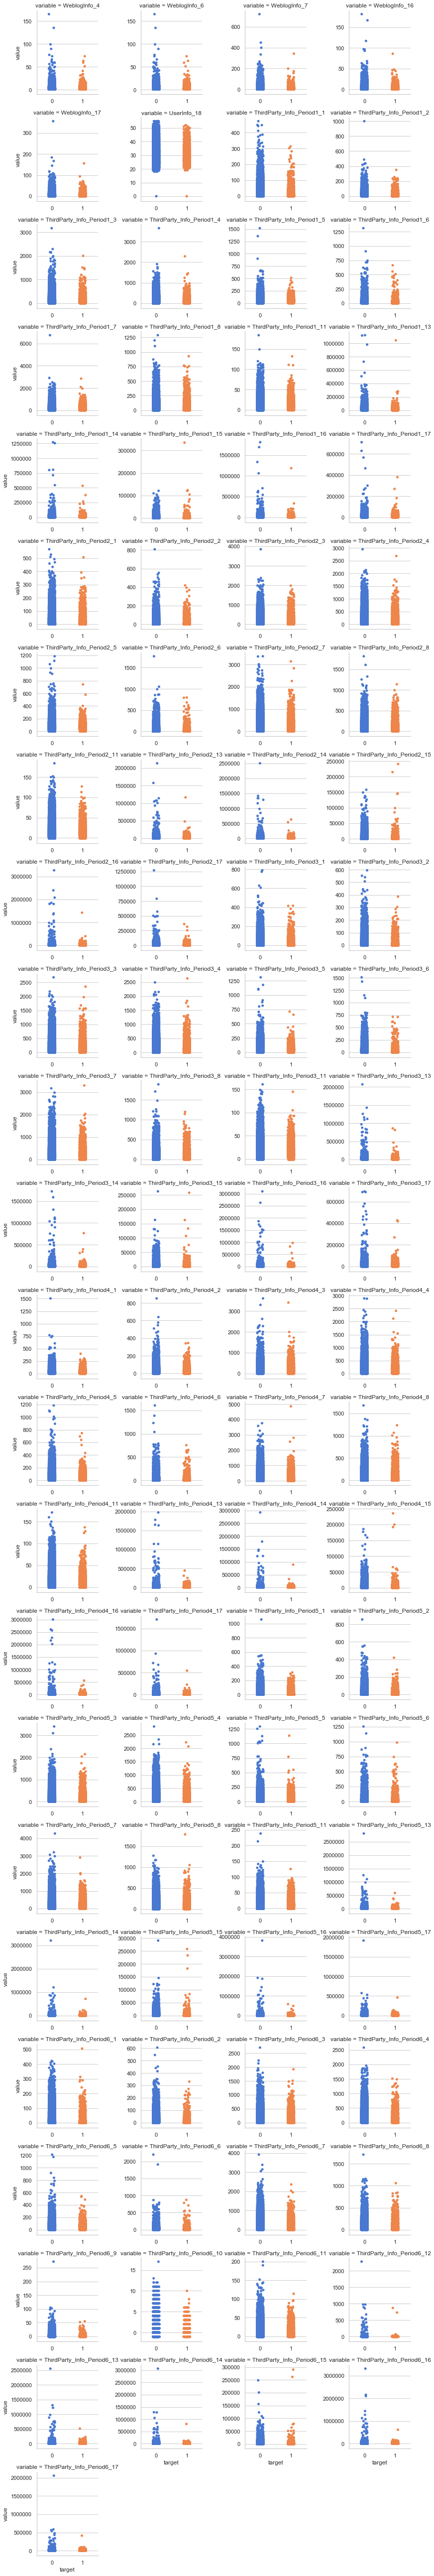

In [45]:
#绘制分布散点图
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'target', 'value', jitter=True, palette="muted")

In [46]:
# 根据图中正负样例的特征取值的分布情况，删除离群点
print('{} lines before drop'.format(train_master.shape[0]))

train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_1 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_2 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_2 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_3 > 2000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_3 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_4 > 1500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_5 > 400)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_7 > 2000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_6 > 1500)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_5 > 1000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_8 > 1500)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_8 > 1000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_16 > 2000000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_14 > 1000000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_12 > 60)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_11 > 120) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_11 > 20) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_13 > 200000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_13 > 150000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_15 > 40000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_17 > 130000) & (train_master.target == 0)].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period5_1 > 500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_2 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_3 > 3000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_3 > 2000)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_5 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_4 > 2000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_6 > 700].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_6 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_7 > 4000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_8 > 800)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_11 > 200)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_13 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_14 > 150000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_15 > 75000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_16 > 180000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_17 > 150000].index, inplace=True)

# go above

train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_1 > 400)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_2 > 350)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_3 > 1500)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_4 > 1600].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_5 > 500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_8 > 1000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_13 > 250000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_14 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_15 > 70000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_16 > 210000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_17 > 160000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period3_1 > 400].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_2 > 380].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_3 > 1750].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_4 > 1750].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_5 > 600].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_7 > 1600) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_8 > 1000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_13 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_14 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_15 > 80000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_16 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_17 > 150000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period2_1 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_1 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_2 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_2 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_3 > 1800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_3 > 1500) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_4 > 1500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_5 > 580].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_7 > 2100].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_8 > 700) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_11 > 120].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_13 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_14 > 170000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_15 > 80000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_15 > 50000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_16 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_17 > 150000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period1_1 > 350].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_1 > 200) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_2 > 300].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_2 > 190) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_3 > 1500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_4 > 1250].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_5 > 400].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_6 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_6 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_7 > 1800].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_8 > 720].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_8 > 600) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_11 > 100].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_13 > 200000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_13 > 140000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_14 > 150000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_15 > 70000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_15 > 30000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_16 > 200000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_16 > 100000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_17 > 100000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_17 > 80000) & (train_master.target == 1)].index, inplace=True)

train_master.drop(train_master[train_master.WeblogInfo_4 > 40].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_6 > 40].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_7 > 150].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_16 > 50].index, inplace=True)
train_master.drop(train_master[(train_master.WeblogInfo_16 > 25) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_17 > 100].index, inplace=True)
train_master.drop(train_master[(train_master.WeblogInfo_17 > 80) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.UserInfo_18 < 10].index, inplace=True)

print('{} lines after drop'.format(train_master.shape[0]))

29189 lines before drop
28074 lines after drop


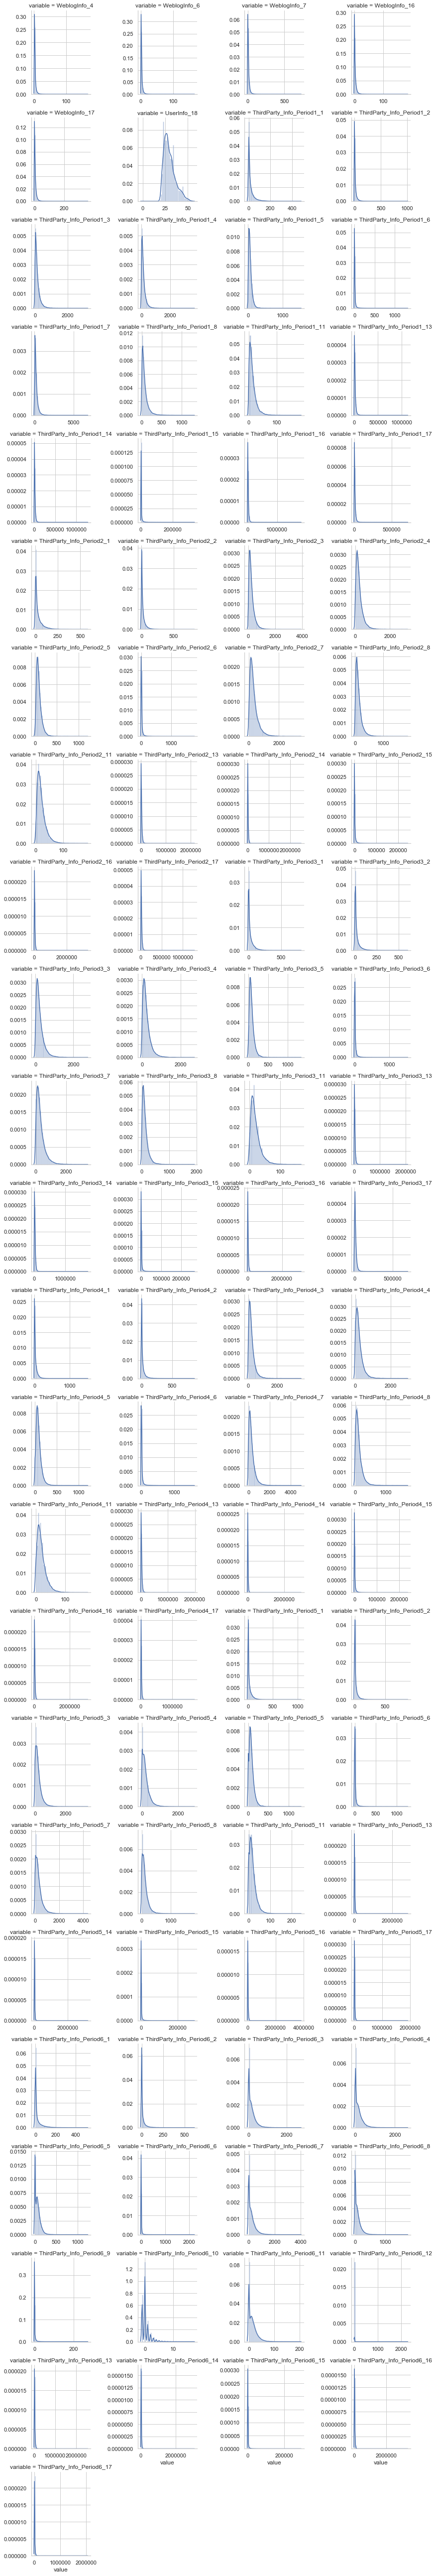

In [47]:
#绘制直方密度图
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

In [48]:
#对数字型的变量进行一些处理
numerical_features_log = [f for f in numerical_features if f not in ['Idx']]
#对数值型特征取log
for f in numerical_features_log:
    train_master[f + '_log'] = np.log1p(train_master[f])
    train_master.drop([f], axis=1, inplace=True)


D:\conda\envs\py36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
#看一下取log以后有多少取负无穷的值
from math import inf
(train_master == -inf).sum().sum()

206845

In [50]:
#将所有的负无穷的值用-1取代
train_master.replace(-inf, -1, inplace=True)

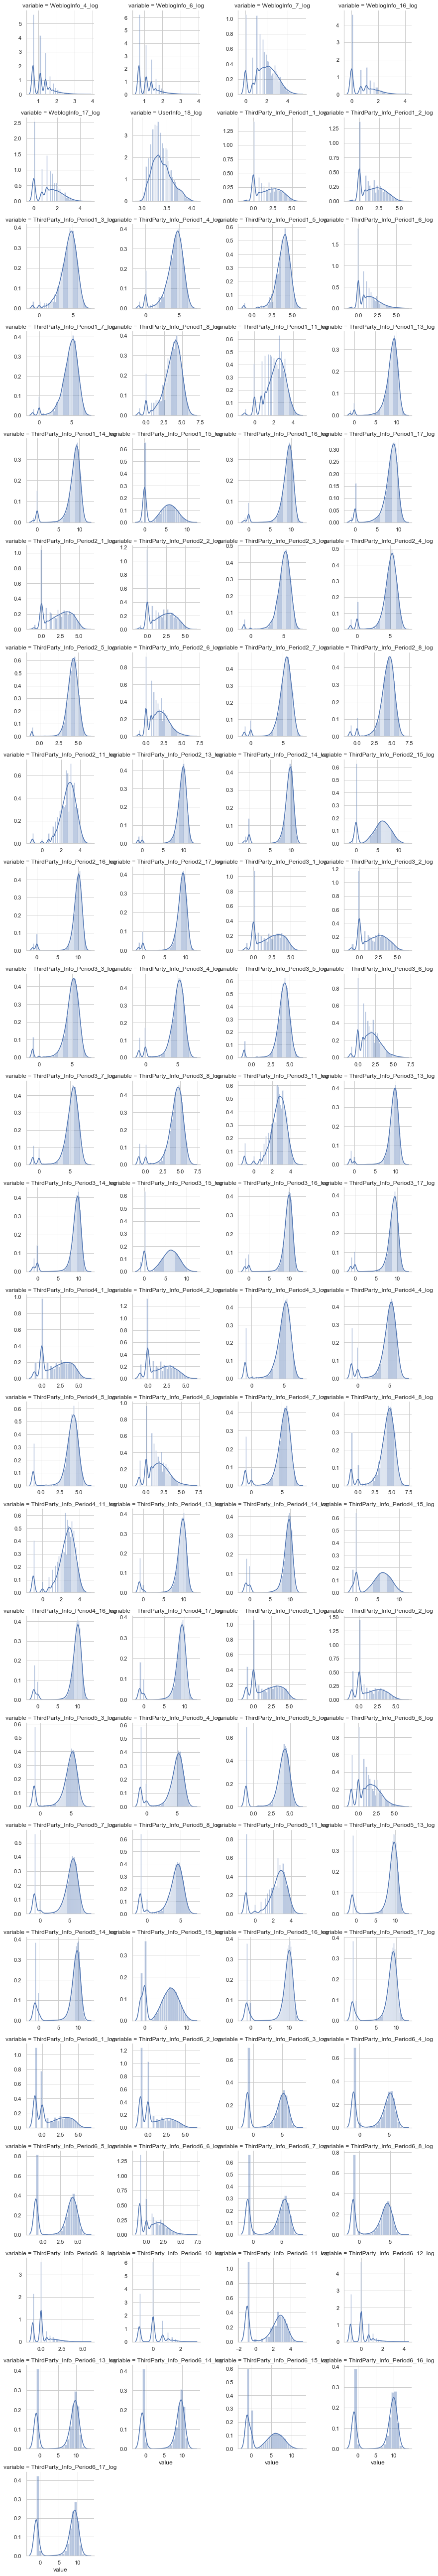

In [51]:
#修改以后的数据再画一次直方密度图
melt = pd.melt(train_master, id_vars=['target'], value_vars = [f+'_log' for f in numerical_features])
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

D:\conda\envs\py36\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


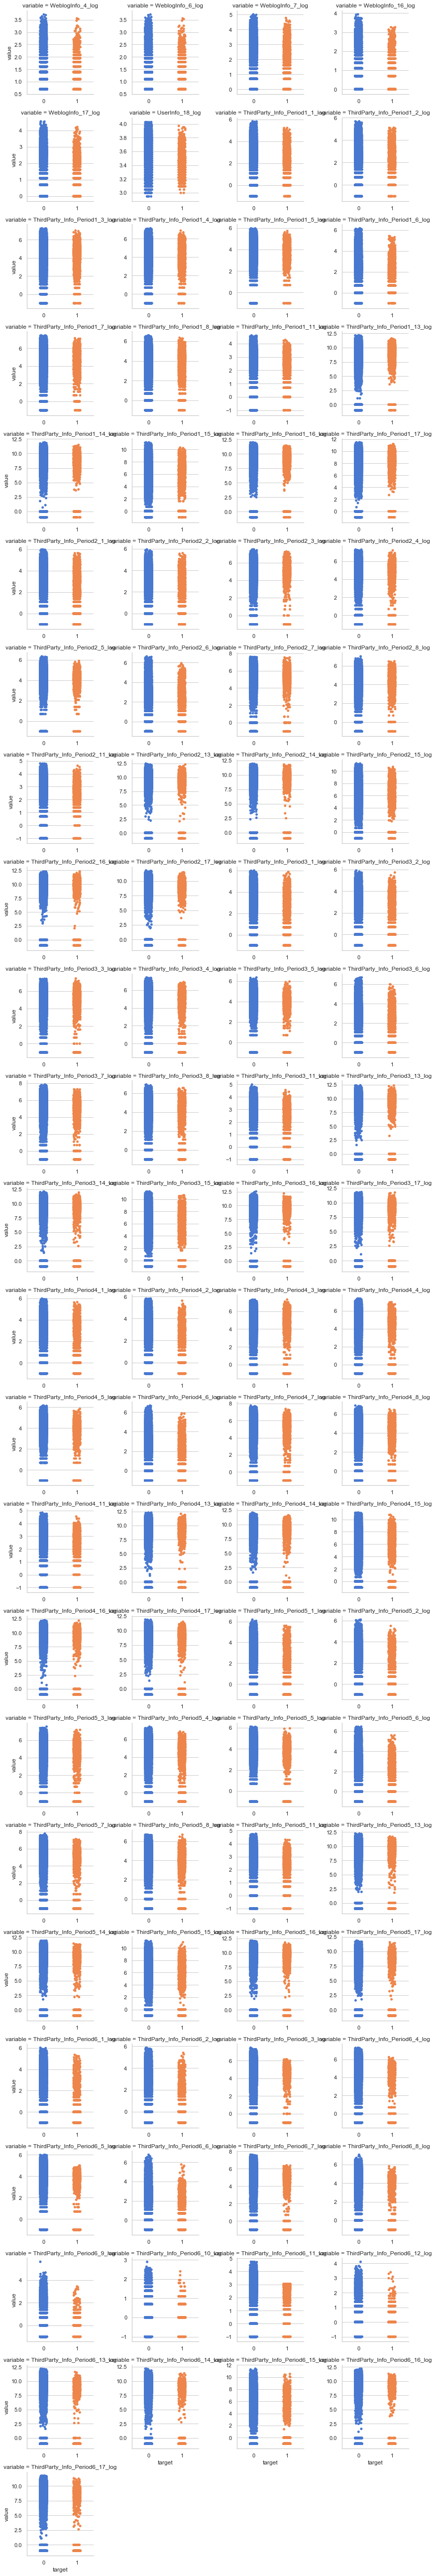

In [52]:
#再绘制一次分布散点图
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'target', 'value', jitter=True, palette="muted")

In [53]:
#将所有特征中的类别型特征提取出来进行处理
melt = pd.melt(train_master, id_vars=['target'], value_vars=[f for f in categorical_features])

D:\conda\envs\py36\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22323 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23452 missing from current fo

D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22323 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23452 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\conda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26124 missing from current font.
  font.set_text(s, 0, flags=flags

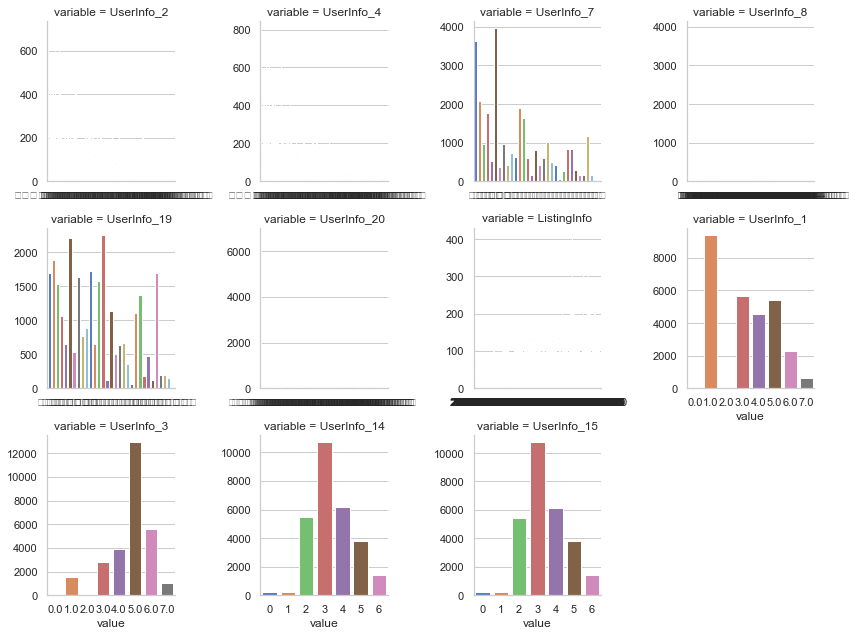

In [54]:
#绘制计数图
g = sns.FacetGrid(melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.countplot, 'value', palette="muted")

In [55]:
#target与其他特征的相关性分析
target_corr = np.abs(train_master.corr()['target']).sort_values(ascending=False)
target_corr

target                            1.000000
ThirdParty_Info_Period6_5_log     0.139606
ThirdParty_Info_Period6_11_log    0.139083
ThirdParty_Info_Period6_4_log     0.137962
ThirdParty_Info_Period6_7_log     0.135729
                                    ...   
b_SocialNetwork_13                     NaN
b_SocialNetwork_14                     NaN
b_SocialNetwork_15                     NaN
b_SocialNetwork_16                     NaN
b_SocialNetwork_17                     NaN
Name: target, Length: 215, dtype: float64

In [56]:
#组合特征
train_master['at_home'] = np.where(train_master['UserInfo_2']==train_master['UserInfo_8'], 1, 0)
train_master['at_home']

0        1
1        1
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    1
Name: at_home, Length: 28074, dtype: int32

In [57]:
train_master_ = train_master.copy()

In [58]:
#对日期特征进行修改
# 用arrow lib，把日期解析成年、月、日、周、星期几、月初/月中/月末。
def parse_date(date_str, str_format='YYYY/MM/DD'):
    d = arrow.get(date_str, str_format)
    # 月初，月中，月末
    month_stage = int((d.day-1) / 10) + 1
    return (d.timestamp, d.year, d.month, d.day, d.week, d.isoweekday(), month_stage)
#这个函数的作用是将日期特征中的关键信息解析出来，然后每一个关键信息作为一个独立的特征
def parse_ListingInfo(date):
    d = parse_date(date, 'YYYY/M/D')
    return Series(d, 
                  index=['ListingInfo_timestamp', 'ListingInfo_year', 'ListingInfo_month',
                           'ListingInfo_day', 'ListingInfo_week', 'ListingInfo_isoweekday', 'ListingInfo_month_stage'], 
                  dtype=np.int32)

ListingInfo_parsed = train_master_['ListingInfo'].apply(parse_ListingInfo)
print('before train_master_ shape {}'.format(train_master_.shape))
train_master_ = train_master_.merge(ListingInfo_parsed, how='left', left_index=True, right_index=True)
print('after train_master_ shape {}'.format(train_master_.shape))

before train_master_ shape (28074, 223)
after train_master_ shape (28074, 230)


In [60]:
#借款人的登陆信息
train_loginfo.head(10)

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27
5,10001,2014-03-05,107,6,2014-03-04
6,10001,2014-03-05,1,1,2014-02-20
7,10001,2014-03-05,1,20,2014-02-20
8,10001,2014-03-05,12,0,2014-02-20
9,10001,2014-03-05,1,2,2014-02-20


In [64]:
#对Idx做group，提取记录数，LogInfo1独立数，登陆次数，日期跨度等信息

# def sub_aggr_loginfo(sub_group):
#     return sub_group.shape[0]

def loginfo_aggr(group):
    #group的数量
    loginfo_num = group.shape[0]
    # 操作代码的数量
    loginfo_LogInfo1_unique_num = group['LogInfo1'].unique().shape[0]
     # 登录时间的数量
    loginfo_active_day_num = group['LogInfo3'].unique().shape[0]
    # 处理登录时间最小值
    min_day = parse_date(np.min(group['LogInfo3']), str_format='YYYY-MM-DD')
    # 处理登陆时间最大值
    max_day = parse_date(np.max(group['LogInfo3']), str_format='YYYY-MM-DD')
    # 最大值和最小值相差多少天
    gap_day = round((max_day[0] - min_day[0]) / 86400)
    
    indexes = {
        'loginfo_num': loginfo_num, 
        'loginfo_LogInfo1_unique_num': loginfo_LogInfo1_unique_num, 
        'loginfo_active_day_num': loginfo_active_day_num, 
        'loginfo_gap_day': gap_day, 
        'loginfo_last_day_timestamp': max_day[0]
    }
    
    def sub_aggr_loginfo(sub_group):
        return sub_group.shape[0]
    sub_group = group.groupby(by=['LogInfo1', 'LogInfo2']).apply(sub_aggr_loginfo)
    indexes['loginfo_LogInfo12_unique_num'] = sub_group.shape[0]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])

train_loginfo_grouped = train_loginfo.groupby(by=['Idx']).apply(loginfo_aggr)
train_loginfo_grouped.head()

,loginfo_num,loginfo_LogInfo1_unique_num,loginfo_active_day_num,loginfo_gap_day,loginfo_last_day_timestamp,loginfo_LogInfo12_unique_num
Idx,,,,,,
3,26,4,8,63,1383264000,9
5,11,6,4,13,1383696000,8
8,125,7,13,12,1383696000,11
12,199,8,11,328,1383264000,14
16,15,4,7,8,1383523200,6


In [65]:
train_loginfo_grouped.head(20)

,loginfo_num,loginfo_LogInfo1_unique_num,loginfo_active_day_num,loginfo_gap_day,loginfo_last_day_timestamp,loginfo_LogInfo12_unique_num
Idx,,,,,,
3,26,4,8,63,1383264000,9
5,11,6,4,13,1383696000,8
8,125,7,13,12,1383696000,11
12,199,8,11,328,1383264000,14
16,15,4,7,8,1383523200,6
17,11,4,5,9,1383609600,6
18,34,4,6,5,1383264000,7
20,16,4,6,5,1383264000,6
21,14,5,4,4,1383264000,8


In [66]:
#借款人修改信息
def userinfo_aggr(group):
    op_columns = ['_EducationId', '_HasBuyCar', '_LastUpdateDate',
       '_MarriageStatusId', '_MobilePhone', '_QQ', '_ResidenceAddress',
       '_ResidencePhone', '_ResidenceTypeId', '_ResidenceYears', '_age',
       '_educationId', '_gender', '_hasBuyCar', '_idNumber',
       '_lastUpdateDate', '_marriageStatusId', '_mobilePhone', '_qQ',
       '_realName', '_regStepId', '_residenceAddress', '_residencePhone',
       '_residenceTypeId', '_residenceYears', '_IsCash', '_CompanyPhone',
       '_IdNumber', '_Phone', '_RealName', '_CompanyName', '_Age',
       '_Gender', '_OtherWebShopType', '_turnover', '_WebShopTypeId',
       '_RelationshipId', '_CompanyAddress', '_Department',
       '_flag_UCtoBcp', '_flag_UCtoPVR', '_WorkYears', '_ByUserId',
       '_DormitoryPhone', '_IncomeFrom', '_CompanyTypeId',
       '_CompanySizeId', '_companyTypeId', '_department',
       '_companyAddress', '_workYears', '_contactId', '_creationDate',
       '_flag_UCtoBCP', '_orderId', '_phone', '_relationshipId', '_userId',
       '_companyName', '_companyPhone', '_isCash', '_BussinessAddress',
       '_webShopUrl', '_WebShopUrl', '_SchoolName', '_HasBusinessLicense',
       '_dormitoryPhone', '_incomeFrom', '_schoolName', '_NickName',
       '_CreationDate', '_CityId', '_DistrictId', '_ProvinceId',
       '_GraduateDate', '_GraduateSchool', '_IdAddress', '_companySizeId',
       '_HasPPDaiAccount', '_PhoneType', '_PPDaiAccount', '_SecondEmail',
       '_SecondMobile', '_nickName', '_HasSbOrGjj', '_Position']

    # group的数量
    userinfo_num = group.shape[0]
    # 修改内容的数量
    userinfo_unique_num = group['UserupdateInfo1'].unique().shape[0]
    # 修改时间的数量
    userinfo_active_day_num = group['UserupdateInfo2'].unique().shape[0]
    # 处理修改时间的最小值
    min_day = parse_date(np.min(group['UserupdateInfo2']))
    # 处理修改时间的最大值
    max_day = parse_date(np.max(group['UserupdateInfo2']))
    # 最小值和最大值相差几天
    gap_day = round((max_day[0] - min_day[0]) / (86400))

    indexes = {
        'userinfo_num': userinfo_num, 
        'userinfo_unique_num': userinfo_unique_num, 
        'userinfo_active_day_num': userinfo_active_day_num, 
        'userinfo_gap_day': gap_day, 
        'userinfo_last_day_timestamp': max_day[0]
    }
    
    for c in op_columns:
        indexes['userinfo' + c + '_num'] = 0

    def sub_aggr(sub_group):
        return sub_group.shape[0]

    sub_group = group.groupby(by=['UserupdateInfo1']).apply(sub_aggr)
    for c in sub_group.index:
        indexes['userinfo' + c + '_num'] = sub_group.loc[c]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])
    
train_userinfo_grouped = train_userinfo.groupby(by=['Idx']).apply(userinfo_aggr)
train_userinfo_grouped.head()

,userinfo_num,userinfo_unique_num,userinfo_active_day_num,userinfo_gap_day,userinfo_last_day_timestamp,userinfo_EducationId_num,userinfo_HasBuyCar_num,userinfo_LastUpdateDate_num,userinfo_MarriageStatusId_num,userinfo_MobilePhone_num,...,userinfo_IdAddress_num,userinfo_companySizeId_num,userinfo_HasPPDaiAccount_num,userinfo_PhoneType_num,userinfo_PPDaiAccount_num,userinfo_SecondEmail_num,userinfo_SecondMobile_num,userinfo_nickName_num,userinfo_HasSbOrGjj_num,userinfo_Position_num
Idx,,,,,,,,,,,,,,,,,,,,,
3,13,11,1,0,1377820800,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
5,13,11,1,0,1382572800,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
8,14,12,2,10,1383523200,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
12,14,14,2,298,1380672000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16,13,12,2,9,1383609600,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#对数据进行合并
print('before merge, train_master shape:{}'.format(train_master_.shape))

# train_master_ = train_master_.merge(train_loginfo_grouped, how='left', left_on='Idx', right_index=True)
# train_master_ = train_master_.merge(train_userinfo_grouped, how='left', left_on='Idx', right_index=True)

train_master_ = train_master_.merge(train_loginfo_grouped, how='left', left_on='Idx', right_on='Idx')
train_master_ = train_master_.merge(train_userinfo_grouped, how='left', left_on='Idx', right_on='Idx')

train_master_.fillna(0, inplace=True)

print('after merge, train_master shape:{}'.format(train_master_.shape))

before merge, train_master shape:(28074, 230)
after merge, train_master shape:(28074, 327)


In [68]:
#将合并好的数据进行保存，以便接下来进行特征的编码与标准化
train_master_.to_csv('train_master_merge.csv')

In [69]:
train_master_merge = pd.read_csv('train_master_merge.csv')
train_master_merge.head()

,Unnamed: 0,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_7,UserInfo_8,UserInfo_14,UserInfo_15,...,userinfo_IdAddress_num,userinfo_companySizeId_num,userinfo_HasPPDaiAccount_num,userinfo_PhoneType_num,userinfo_PPDaiAccount_num,userinfo_SecondEmail_num,userinfo_SecondMobile_num,userinfo_nickName_num,userinfo_HasSbOrGjj_num,userinfo_Position_num
0,0,10001,1.0,深圳,4.0,深圳,广东,深圳,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,10002,1.0,温州,4.0,温州,浙江,温州,3,3,...,0,0,0,0,0,0,0,0,0,0
2,2,10003,1.0,宜昌,3.0,宜昌,湖北,宜昌,4,4,...,0,0,0,0,0,0,0,0,0,0
3,3,10006,4.0,南平,1.0,南平,福建,南平,2,2,...,0,0,0,0,0,0,0,0,0,0
4,4,10007,5.0,辽阳,1.0,辽阳,辽宁,辽阳,3,3,...,0,0,0,0,0,0,0,0,0,0
